# Time Series Shapelet_Motif_Classification

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMinMax
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from pyts.transformation import ShapeletTransform
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [67]:
y_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/3Modulo/Dataset/y_train.txt", header=None, delim_whitespace=True )
y_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/3Modulo/Dataset/y_test.txt", header=None, delim_whitespace=True )

body_gyro_x_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/3Modulo/Dataset/body_gyro_x_train.txt", header=None,  delim_whitespace=True)
body_gyro_y_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/3Modulo/Dataset/body_gyro_y_train.txt", header=None,  delim_whitespace=True)
body_gyro_x_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/3Modulo/Dataset/body_gyro_x_test.txt", header=None,  delim_whitespace=True)
body_gyro_y_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/3Modulo/Dataset/body_gyro_y_test.txt", header=None,  delim_whitespace=True)
body_acc_x_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/3Modulo/Dataset/body_acc_x_train.txt", header=None,  delim_whitespace=True)
body_gyro_z_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/3Modulo/Dataset/body_gyro_z_train.txt", header=None,  delim_whitespace=True)
body_gyro_z_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/3Modulo/Dataset/body_gyro_z_test.txt", header=None,  delim_whitespace=True)

## Shaplet Classifiers

In [14]:
#!pip install pyts

In [15]:
X_train=body_gyro_z_train.copy(deep=True)
X_test=body_gyro_z_test.copy(deep=True)

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [17]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series

In [18]:
X_train_norm= scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1])
X_test_norm= scaler.fit_transform(X_test).reshape(X_test.shape[0], X_test.shape[1])
X_train_norm.shape

(7352, 128)

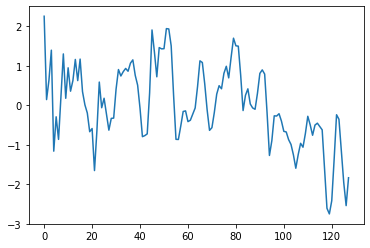

In [19]:
#plt.plot(X_train.T[0])
plt.plot(X_train_norm[0])
plt.show()

In [20]:
clf_1 = DecisionTreeClassifier(min_samples_split=33, min_samples_leaf =33 , random_state=42)
clf_1.fit(X_train, y_train)

y_pred_dt1 = clf_1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_dt1))
print('F1-score %s' % f1_score(y_test, y_pred_dt1, average=None))
print(classification_report(y_test, y_pred_dt1))

Accuracy 0.4628435697319308
F1-score [0.50799624 0.5536105  0.38047559 0.38669439 0.43313201 0.50551655]
              precision    recall  f1-score   support

           1       0.48      0.54      0.51       496
           2       0.57      0.54      0.55       471
           3       0.40      0.36      0.38       420
           4       0.39      0.38      0.39       491
           5       0.40      0.47      0.43       532
           6       0.55      0.47      0.51       537

    accuracy                           0.46      2947
   macro avg       0.47      0.46      0.46      2947
weighted avg       0.47      0.46      0.46      2947



In [21]:
clf_knn_1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
clf_knn_1.fit(X_train, np.ravel(y_train))

y_pred_Knn1 = clf_knn_1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_Knn1))
print('F1-score %s' % f1_score(y_test, y_pred_Knn1, average=None))
print(classification_report(y_test, y_pred_Knn1))

Accuracy 0.5310485239226331
F1-score [0.69184891 0.80089485 0.30708661 0.44934641 0.33730835 0.56617647]
              precision    recall  f1-score   support

           1       0.68      0.70      0.69       496
           2       0.85      0.76      0.80       471
           3       0.89      0.19      0.31       420
           4       0.38      0.56      0.45       491
           5       0.31      0.37      0.34       532
           6       0.56      0.57      0.57       537

    accuracy                           0.53      2947
   macro avg       0.61      0.53      0.53      2947
weighted avg       0.60      0.53      0.53      2947



## ShapeletModel

In [22]:
#!pip install tensorflow

In [23]:
import tensorflow as tf
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.metrics import accuracy_score, f1_score, classification_report
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [24]:
n_ts, ts_sz = X_train.shape
n_classes = 6

shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts, ts_sz=ts_sz, n_classes=n_classes, l=0.1, r=1)

print('Number of time series:', n_ts)
print('Time series size:', ts_sz)
print('n_classes:', n_classes)
print('shapelet_sizes:', shapelet_sizes)

Number of time series: 7352
Time series size: 128
n_classes: 6
shapelet_sizes: {12: 6}


In [25]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=0,
                        random_state=0)

shp_clf.fit(X_train, np.ravel(y_train))

c:\anaconda3n\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


LearningShapelets(max_iter=200, n_shapelets_per_size={12: 6}, random_state=0,
                  weight_regularizer=0.01)

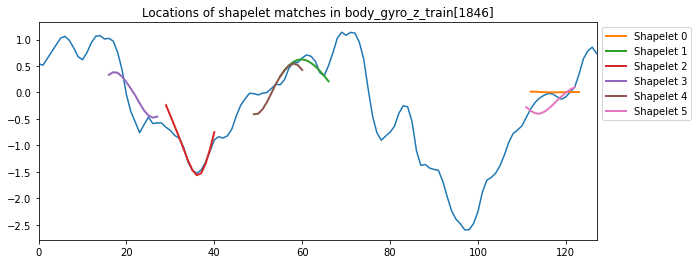

In [26]:
#Location Shapelet in X_train
predicted_locations = shp_clf.locate(X_train)

ts_id = 2528
plt.figure(figsize=(10,4))
n_shapelets = sum(shapelet_sizes.values())
plt.title("Locations of shapelet matches in body_gyro_z_train[1846]") 
plt.plot(X_train.iloc[ts_id,:])
plt.xlim([0,127])
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2, label = 'Shapelet {}'.format(idx_shp))
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
#plt.savefig('FigXX-Shapelets.png', dpi=600,bbox_inches = 'tight') 
plt.show()

In [27]:
shp_clf.fit(X_train, np.ravel(y_train))

LearningShapelets(max_iter=200, n_shapelets_per_size={12: 6}, random_state=0,
                  weight_regularizer=0.01)

In [28]:
shp_clf.shapelets_

array([array([[0.01566566],
              [0.01327516],
              [0.00947569],
              [0.00466648],
              [0.00236332],
              [0.00174773],
              [0.00240174],
              [0.00390619],
              [0.00540646],
              [0.00720967],
              [0.00660653],
              [0.00654833]]), array([[0.30386534],
                                     [0.42205212],
                                     [0.51119477],
                                     [0.577779  ],
                                     [0.61584461],
                                     [0.62551814],
                                     [0.60438114],
                                     [0.55841756],
                                     [0.49246183],
                                     [0.40763694],
                                     [0.31313962],
                                     [0.2097825 ]]),
       array([[-0.24173555],
              [-0.43922883],
              [-0.64

In [29]:
predicted_labels = shp_clf.predict(X_test)
print("Correct classification rate:", accuracy_score(y_test, predicted_labels))

Correct classification rate: 0.3169324737020699


In [30]:
predicted_locations = shp_clf.locate(X_test)

c:\anaconda3n\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Correct classification rate: 0.27078384798099764


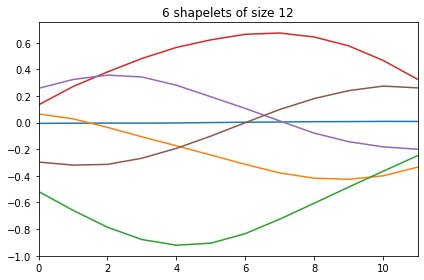

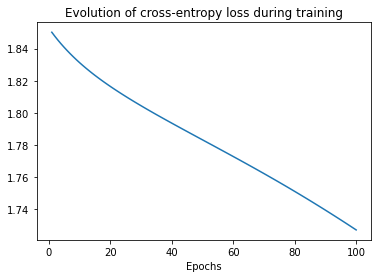

In [31]:
## ALTERNATIVA ##
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.shapelets import LearningShapelets, \
    grabocka_params_to_shapelet_size_dict
from tslearn.utils import ts_size

# Get statistics of the dataset
n_ts, ts_sz = body_gyro_z_train.shape
n_classes = 6 # len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

# Define the model using parameters provided by the authors (except that we
# use fewer iterations here)
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                            optimizer="sgd", #tf.optimizers.Adam(.01),
                            #batch_size=16,
                            weight_regularizer=.01,
                            max_iter=100,
                            random_state=42,
                            verbose=0)
shp_clf.fit(X_train, np.ravel(y_train))

# Make predictions and calculate accuracy score
pred_labels = shp_clf.predict(X_test)
print("Correct classification rate:", accuracy_score(y_test, pred_labels))

# Plot the different discovered shapelets
plt.figure()
for i, sz in enumerate(shapelet_sizes.keys()):
    plt.subplot(len(shapelet_sizes), 1, i + 1)
    plt.title("%d shapelets of size %d" % (shapelet_sizes[sz], sz))
    for shp in shp_clf.shapelets_:
        if ts_size(shp) == sz:
            plt.plot(shp.ravel())
    plt.xlim([0, max(shapelet_sizes.keys()) - 1])

plt.tight_layout()
plt.show()

# The loss history is accessible via the `model_` that is a keras model
plt.figure()
plt.plot(numpy.arange(1, shp_clf.n_iter_ + 1), shp_clf.history_["loss"])
plt.title("Evolution of cross-entropy loss during training")
plt.xlabel("Epochs")
plt.show()

## Shaplet-distances-based Classifier

In [32]:
X_train2 = shp_clf.transform(X_train)
X_train2.shape

(7352, 6)

In [33]:
X_test2 = shp_clf.transform(X_test)
X_test2.shape

(2947, 6)

In [34]:
X_train_norm2 = shp_clf.transform(X_train_norm)
X_test_norm2 = shp_clf.transform(X_test_norm)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

Minimum error:- 0.46080760095011875 at K = 25
CPU times: total: 5.38 s
Wall time: 5.37 s


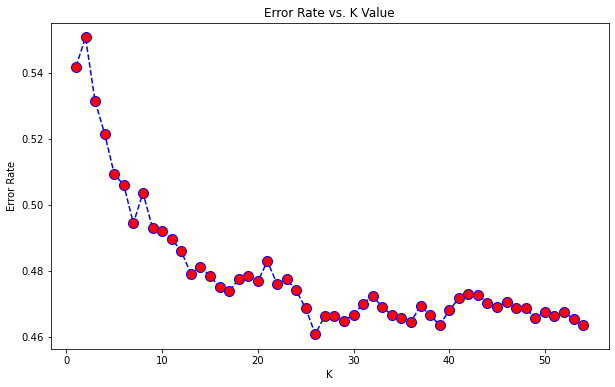

In [36]:
%%time
error_rate = []
for i in range(1,55):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2,np.ravel(y_train))
    pred_i = knn.predict(X_test2)
    error_rate.append(np.mean(pred_i != np.ravel(y_test)))
#print(pred_i)
plt.figure(figsize=(10,6))
plt.plot(range(1,55),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [37]:
# Knn: mon normalizzato
clf_knn = KNeighborsClassifier(n_neighbors=28, weights='uniform')
clf_knn.fit(X_train2, np.ravel(y_train))
y_pred_knn = clf_knn.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn))
print('F1-score %s' % f1_score(y_test, y_pred_knn, average=None))
print(classification_report(y_test, y_pred_knn))

Accuracy 0.5337631489650492
F1-score [0.58184765 0.64146621 0.41509434 0.4103139  0.5482866  0.55531453]
              precision    recall  f1-score   support

           1       0.49      0.72      0.58       496
           2       0.70      0.59      0.64       471
           3       0.53      0.34      0.42       420
           4       0.46      0.37      0.41       491
           5       0.47      0.66      0.55       532
           6       0.66      0.48      0.56       537

    accuracy                           0.53      2947
   macro avg       0.55      0.53      0.53      2947
weighted avg       0.55      0.53      0.53      2947



In [38]:
# Knn: normalizzato
clf_knn_norm = KNeighborsClassifier(n_neighbors=28, weights='uniform')
clf_knn_norm.fit(X_train_norm2, np.ravel(y_train))
y_pred_knn_norm = clf_knn_norm.predict(X_test_norm2)

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn_norm))
print('F1-score %s' % f1_score(y_test, y_pred_knn_norm, average=None))
print(classification_report(y_test, y_pred_knn_norm))

Accuracy 0.3243976925687139
F1-score [0.45492142 0.30322581 0.18234443 0.25835189 0.36020583 0.302     ]
              precision    recall  f1-score   support

           1       0.39      0.55      0.45       496
           2       0.31      0.30      0.30       471
           3       0.23      0.15      0.18       420
           4       0.29      0.24      0.26       491
           5       0.33      0.39      0.36       532
           6       0.33      0.28      0.30       537

    accuracy                           0.32      2947
   macro avg       0.31      0.32      0.31      2947
weighted avg       0.31      0.32      0.31      2947



In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
params = { "max_depth" : [None,2,4,8,12,16,22], 
          "min_samples_split" : np.arange(2,50,2),
          "min_samples_leaf" : np.arange(1,50,2)   
}

In [ ]:
%%time
grid = GridSearchCV(DecisionTreeClassifier(), params,cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X_train2, y_train)

In [ ]:
grid.best_params_

In [41]:
# Decision Tree: non normalizzato
clf_dt = DecisionTreeClassifier( max_depth=8, min_samples_leaf=15, min_samples_split=4, random_state=42)
clf_dt.fit(X_train2, y_train)

y_pred_dt = clf_dt.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred_dt))
print('F1-score %s' % f1_score(y_test, y_pred_dt, average=None))
print(classification_report(y_test, y_pred_dt))

Accuracy 0.5184933831014591
F1-score [0.55143339 0.62459195 0.37554585 0.31523179 0.58060014 0.54704595]
              precision    recall  f1-score   support

           1       0.47      0.66      0.55       496
           2       0.64      0.61      0.62       471
           3       0.48      0.31      0.38       420
           4       0.45      0.24      0.32       491
           5       0.46      0.78      0.58       532
           6       0.66      0.47      0.55       537

    accuracy                           0.52      2947
   macro avg       0.53      0.51      0.50      2947
weighted avg       0.53      0.52      0.50      2947



In [42]:
# Decision Tree: normalizzato
clf_dt_norm = DecisionTreeClassifier(min_samples_split=50, min_samples_leaf =50 , random_state=42)
clf_dt_norm.fit(X_train_norm2, y_train)

y_pred_dt_norm = clf_dt_norm.predict(X_test_norm2)

print('Accuracy %s' % accuracy_score(y_test, y_pred_dt_norm))
print('F1-score %s' % f1_score(y_test, y_pred_dt_norm, average=None))
print(classification_report(y_test, y_pred_dt_norm))

Accuracy 0.30844927044451986
F1-score [0.42575107 0.2964467  0.15781923 0.25922023 0.33854167 0.30021142]
              precision    recall  f1-score   support

           1       0.37      0.50      0.43       496
           2       0.28      0.31      0.30       471
           3       0.20      0.13      0.16       420
           4       0.27      0.25      0.26       491
           5       0.31      0.37      0.34       532
           6       0.35      0.26      0.30       537

    accuracy                           0.31      2947
   macro avg       0.30      0.30      0.30      2947
weighted avg       0.30      0.31      0.30      2947



## Univariate Time Series Classifiers


In [44]:
#!pip install sktime
from pyts.datasets import load_basic_motions
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np
from sklearn.metrics import classification_report
from sktime.utils.plotting import plot_series
from pyts.datasets import fetch_uea_dataset
from sktime.datatypes._panel._convert import from_3d_numpy_to_nested

In [45]:
X_train=body_gyro_z_train.copy(deep=True)
X_test=body_gyro_z_test.copy(deep=True)

In [46]:
# trasformare il dataset in una colonna sola con cella contente l'intera time series
X_train_uni=from_3d_numpy_to_nested(X_train_norm.reshape(7352,1,128))
X_test_uni=from_3d_numpy_to_nested(X_test_norm.reshape(2947,1,128))

In [47]:
clf_uni = KNeighborsTimeSeriesClassifier()
clf_uni.fit(X_train_uni, np.ravel(y_train))

KNeighborsTimeSeriesClassifier()

In [48]:
%%time
y_pred_uni = clf_uni.predict(X_test_uni)
print(classification_report(y_test, y_pred_uni))

              precision    recall  f1-score   support

           1       0.58      0.86      0.69       496
           2       0.58      0.66      0.62       471
           3       0.43      0.38      0.41       420
           4       0.35      0.31      0.33       491
           5       0.35      0.35      0.35       532
           6       0.49      0.32      0.39       537

    accuracy                           0.48      2947
   macro avg       0.46      0.48      0.46      2947
weighted avg       0.46      0.48      0.46      2947

CPU times: total: 50min 35s
Wall time: 50min 39s


### ROCKET

In [51]:
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import Rocket

In [55]:
#%%time

rocket_1 = Rocket()  # by default, MiniRocket uses ~10,000 kernels
rocket_1.fit(X_train_uni)
X_train_transform_ro1 = rocket_1.transform(X_train_uni)
clf_ridge = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
clf_ridge.fit(X_train_transform_ro1.values, y_train)

c:\anaconda3n\lib\site-packages\sklearn\linear_model\_ridge.py:1178: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]))

In [56]:
X_test_transform_ro1 = rocket_1.transform(X_test_uni)
y_pred_rocket1 = clf_ridge.predict(X_test_transform_ro1.values)
print(classification_report(y_test, y_pred_rocket1))

              precision    recall  f1-score   support

           1       0.88      0.69      0.77       496
           2       0.78      0.83      0.80       471
           3       0.70      0.66      0.68       420
           4       0.34      0.35      0.35       491
           5       0.42      0.49      0.45       532
           6       0.53      0.53      0.53       537

    accuracy                           0.59      2947
   macro avg       0.61      0.59      0.60      2947
weighted avg       0.60      0.59      0.59      2947



### MINI-ROCKET


In [57]:
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import MiniRocket

In [58]:
%%time
minirocket_mini1 = MiniRocket()  # by default, MiniRocket uses ~10,000 kernels
minirocket_mini1.fit(X_train_uni)
X_train_transform_min1 = minirocket_mini1.transform(X_train_uni)
clf_ridge_min = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
clf_ridge_min.fit(X_train_transform_min1.values, y_train)

c:\anaconda3n\lib\site-packages\sklearn\linear_model\_ridge.py:1178: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 6min 2s
Wall time: 1min 29s


RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]))

In [59]:
X_test_transform_min1 = minirocket_mini1.transform(X_test_uni)
y_pred_min1 = clf_ridge_min.predict(X_test_transform_min1.values)
print(classification_report(y_test, y_pred_min1))

              precision    recall  f1-score   support

           1       0.87      0.67      0.76       496
           2       0.82      0.90      0.86       471
           3       0.69      0.73      0.71       420
           4       0.37      0.36      0.36       491
           5       0.46      0.52      0.49       532
           6       0.58      0.57      0.57       537

    accuracy                           0.62      2947
   macro avg       0.63      0.63      0.63      2947
weighted avg       0.63      0.62      0.62      2947



### Canonical Interval Forest (CIF)

In [60]:
from sktime.classification.interval_based import CanonicalIntervalForest

In [65]:
y_train

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [66]:
%%time
clf_canon = CanonicalIntervalForest(n_estimators=30)
clf_canon.fit(X_train_uni, np.ravel(y_train))

CPU times: total: 24min 39s
Wall time: 24min 41s


CanonicalIntervalForest(n_estimators=30)

In [68]:
y_pred_canon = clf_canon.predict(X_test_uni)
print(classification_report(y_test, y_pred_canon))

              precision    recall  f1-score   support

           1       0.58      0.74      0.65       496
           2       0.73      0.65      0.69       471
           3       0.48      0.40      0.43       420
           4       0.42      0.32      0.37       491
           5       0.42      0.47      0.44       532
           6       0.53      0.56      0.54       537

    accuracy                           0.53      2947
   macro avg       0.53      0.52      0.52      2947
weighted avg       0.52      0.53      0.52      2947



## MULTIVARIATE

In [69]:
X_train=body_gyro_x_train.copy(deep=True)
Y_train=body_gyro_y_train.copy(deep=True)
Z_train=body_gyro_z_train.copy(deep=True)

X_test=body_gyro_x_test.copy(deep=True)
Y_test=body_gyro_y_test.copy(deep=True)
Z_test=body_gyro_z_test.copy(deep=True)

In [70]:
X_train_norm= scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1])
X_test_norm= scaler.fit_transform(X_test).reshape(X_test.shape[0], X_test.shape[1])

Y_train_norm= scaler.fit_transform(Y_train).reshape(Y_train.shape[0], Y_train.shape[1])
Y_test_norm= scaler.fit_transform(Y_test).reshape(Y_test.shape[0], Y_test.shape[1])

Z_train_norm= scaler.fit_transform(Z_train).reshape(Z_train.shape[0], Z_train.shape[1])
Z_test_norm= scaler.fit_transform(Z_test).reshape(Z_test.shape[0], Z_test.shape[1])

In [71]:
X_train_uni=from_3d_numpy_to_nested(X_train_norm.reshape(7352,1,128))
Y_train_uni=from_3d_numpy_to_nested(Y_train_norm.reshape(7352,1,128))
Z_train_uni=from_3d_numpy_to_nested(Z_train_norm.reshape(7352,1,128))


X_test_uni=from_3d_numpy_to_nested(X_test_norm.reshape(2947,1,128))
Y_test_uni=from_3d_numpy_to_nested(Y_test_norm.reshape(2947,1,128))
Z_test_uni=from_3d_numpy_to_nested(Z_test_norm.reshape(2947,1,128))

In [72]:
XY_train_uni=pd.merge(left=X_train_uni, right=Y_train_uni,right_index=True, left_index=True)

In [73]:
XYZ_train_uni=pd.merge(left=XY_train_uni, right=Z_train_uni,right_index=True, left_index=True)

In [74]:
XYZ_train_uni.columns

Index(['var_0_x', 'var_0_y', 'var_0'], dtype='object')

In [75]:
XY_test_uni=pd.merge(left=X_test_uni, right=Y_test_uni,right_index=True, left_index=True)

In [76]:
XYZ_test_uni=pd.merge(left=XY_test_uni, right=Z_test_uni,right_index=True, left_index=True)

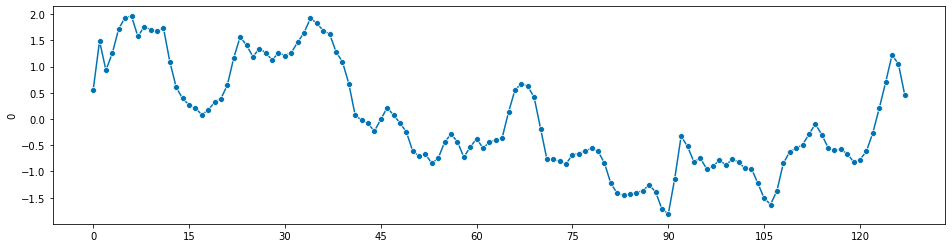

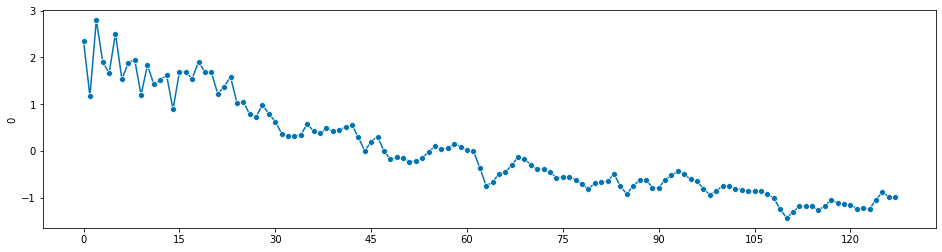

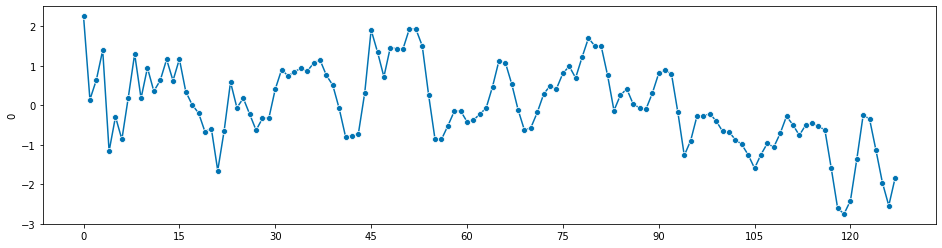

In [77]:
plot_series(XYZ_train_uni['var_0_x'][0])
plot_series(XYZ_train_uni['var_0_y'][0])
plot_series(XYZ_train_uni['var_0'][0])
plt.show()

### 1-NN with DTW (baseline)

In [78]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [79]:
%%time
clf_multi = KNeighborsTimeSeriesClassifier()
clf_multi.fit(XYZ_train_uni, np.ravel(y_train))

CPU times: total: 17.9 s
Wall time: 18 s


KNeighborsTimeSeriesClassifier()

In [80]:
%%time
y_pred_2 = clf_multi.predict(XYZ_test_uni)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           1       0.89      0.91      0.90       496
           2       0.73      0.90      0.81       471
           3       0.92      0.82      0.87       420
           4       0.45      0.37      0.40       491
           5       0.49      0.40      0.44       532
           6       0.54      0.65      0.59       537

    accuracy                           0.67      2947
   macro avg       0.67      0.67      0.67      2947
weighted avg       0.66      0.67      0.66      2947

CPU times: total: 1h 7min 4s
Wall time: 1h 7min 9s


### Rocket

In [81]:
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import Rocket

In [82]:
rocket_multi = Rocket()
rocket_multi.fit(XYZ_train_uni)
XYZ_train_transform_ro2 = rocket_multi.transform(XYZ_train_uni)
clf_ro2 = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
clf_ro2.fit(XYZ_train_transform_ro2.values, y_train)

c:\anaconda3n\lib\site-packages\sklearn\linear_model\_ridge.py:1178: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda3n\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [83]:
XYZ_test_transform_ro2 = rocket_multi.transform(XYZ_test_uni)
y_pred_ro2 = clf_ro2.predict(XYZ_test_transform_ro2.values)
print(classification_report(y_test, y_pred_ro2))

              precision    recall  f1-score   support

           1       0.99      0.78      0.87       496
           2       0.94      0.93      0.94       471
           3       0.83      0.91      0.87       420
           4       0.65      0.73      0.69       491
           5       0.73      0.79      0.76       532
           6       0.76      0.71      0.73       537

    accuracy                           0.80      2947
   macro avg       0.82      0.81      0.81      2947
weighted avg       0.81      0.80      0.81      2947



### MINI-ROCKET


In [84]:
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import MiniRocketMultivariate

In [85]:
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import MiniRocketMultivariate

In [88]:
minirocket_multi = Rocket()
minirocket_multi.fit(XYZ_train_uni)
XYZ_train_transform_ro2 = rocket_multi.transform(XYZ_train_uni)
clf_miniro2 = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
clf_miniro2.fit(XYZ_train_transform_ro2.values, y_train)

XYZ_test_transform_mini2 = minirocket_multi.transform(XYZ_test_uni)
y_pred_mini2 = clf_miniro2.predict(XYZ_test_transform_mini2.values)
print(classification_report(y_test, y_pred_mini2))